## **MNIST Handwritten number recognition using Keras**

![MNIST Examples](https://burnt-dedication-042.notion.site/image/https%3A%2F%2Fprod-files-secure.s3.us-west-2.amazonaws.com%2F31c5e285-d3ae-48a7-9d0d-f149fc3bc13f%2F514fcb0f-ace5-442f-bfc8-bcc20ee4e32c%2FMnistExamplesModified.png?table=block&id=f06e9c5e-a19c-43f4-8e8d-35c186016a71&spaceId=31c5e285-d3ae-48a7-9d0d-f149fc3bc13f&width=1110&userId=&cache=v2)

When starting with Machine Learning, **MNIST Handwritten number recognition comes as the first project in everyone’s mind because of its simplicity, abundant data, and magical results**. It can also be thought of as the ‘Hello World of ML world.

So, In today’s blog, we will see how to implement it. You might be thinking, everyone has made a tutorial on it, so what’s special in this one? **The special thing in my project is that I have also made a live interactive predictor at the end, where you will draw the number and our trained model will predict it.** So without any further due, Let’s do it…

# Step 1 - Import Libraries

Make sure to install the necessary libraries.

In [18]:
# already installed when using kaggle
# pip install cv2 numpy matplotlib keras tensorflow --quiet

In [75]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Flatten,Dropout,Dense,MaxPooling2D
from tensorflow.keras.optimizers import SGD
import tensorflow.keras.utils as np_utils

%matplotlib inline

# Step 2 - Import Training and Testing Data

The MNIST dataset is already available inside the keras python package.

In [76]:
(train_X,train_y),(test_X,test_y) = mnist.load_data()

- ```train_X``` & ```train_Y```: these are the data that we are going to use to train our predictive model
<br />
- ```test_X``` & ```test_Y```: these are the data that we are going to use to test our predictive model's accuracy

In [77]:
train_X.shape

(60000, 28, 28)

```train_X.shape``` shows us the shape of the tensor containing the dataset.
<br/>
The images are 28x28 pixels, and there are 60,000 of them in the train_X dataset.

This is a sample of an image from our dataset.

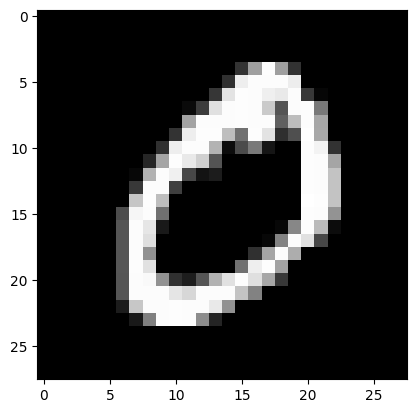

In [78]:
plt.imshow(train_X[1],cmap='gray')

As you know from your maths lessons, we usually use 'x' to symbolise the input of a function and 'y' to symbolise its output.
<br />
In the same way we use 'X' to symbolise the input of our model and 'Y' the output.
<br /><br />
```train_X``` & ```test_X``` are the inputs - the image - that we are going to pass to our model.
<br />
```train_Y``` & ```test_Y``` are the expected outputs - the number aka the label - that we will train our model to output.

Let’s see how ```train_y``` looks. ```train_y``` contains exact numbers written in the image. Like the image on index 1 is shown above and the number on the 1st index in ```train_y``` is 0. But we can't give data in this format to our data, we need to [one-hot encode](https://deepchecks.com/glossary/one-hot-encoding/#:~:text=One%2Dhot%20encoding%20in%20machine,categorical%20data%20in%20machine%20learning.) it.

![array](https://machinelearningprojects.net/wp-content/uploads/2021/07/3-2.png)

# Step 3 – Preprocess our training and testing data.

In [79]:
# Our input shape was (60000,28,28), but Keras wants the data in (60000,28,28,1) format,
# that’s why we are reshaping it.
train_X = train_X.reshape(-1,28,28,1)
test_X  = test_X.reshape(-1,28,28,1)

# We are converting the integer labels to floats, like the element at 1st index was 1 which is an int,
# now it will be 1.0 which is a float.
train_X = train_X.astype('float32')
test_X  = test_X.astype('float32')

# We are normalizing our image, as we know our grayscale image is just a 2D image with all values
# ranging from 0-255, that’s why we are diving this image/2D matrix by 255 to bring everything
# in range 0-1.
train_X = train_X/255
test_X  = test_X/255

# One Hot encode the labels. Previously at 1st index, we had 1 but now a 10-element array will
# be there which is [1,0,0,0,0,0,0,0,0,0] where 1 depicts the presence of that number.
# 1 is present at the 0 index means this array represents the number 0.
train_y = np_utils.to_categorical(train_y)
test_y  = np_utils.to_categorical(test_y)

# Step 4 – Let’s create our CNN model for MNIST Handwritten number recognition.

In [83]:
# Create a new model with no layers
model = Sequential()

In [84]:
# Let’s add a 2D convolution layer with 32 filters, kernel size of 3X3,
# activation function set to ReLU, input shape of 28X28X1 (shape of our mnist images),
# and padding set to SAME.
model.add(Conv2D(32, kernel_size=(3,3), activation='relu',input_shape=(28,28,1), padding='SAME'))
# Add a MaxPooling layer with pool size of 2X2.
model.add(MaxPooling2D(pool_size=(2,2)))

In [85]:
# another set of Convolution and MaxPooling layers
model.add(Conv2D(64,(3,3),activation='relu',padding='SAME'))
model.add(MaxPooling2D(pool_size=(2,2)))

# we add a dropout layer that will help us prevent overfitting
# we can use dropout layers after any non-output layer
# we usually use Dropout layers with a lower level p (0.1-0.25) after convolutional layers
model.add(Dropout(0.25))

In [86]:
# we flatten our input to get a single vector
model.add(Flatten())

# we add a Dense layer - a simple layer with 128 in it
model.add(Dense(128,activation='relu'))

# we add another dropout layer
# we usually use Dropout layers with a higher level p (around 0.5) after activation layers
model.add(Dropout(0.5))

In [87]:
# we need to add a final Dense layer with 10 neurons, because this is the length of the output vector
# that we want. remember we need a vector with 10 numbers, the one-hot encoded version of the labels
# as output. this is how the model will tell us which number does it predict for the given image

# we use the softmax activation function. Softmax works best with multilabel classification.
# It will give the highest probability to that neuron which will be at the index of the image
# provided. Like if the image provided is of 5, the output could be something like
# [0.001, 0.0003, 0.0, 0.0, 0.99, 0.008, 0.00065, 0.0, 0.0, 0.0]
model.add(Dense(10,activation='softmax'))

In [88]:
# now we compile our model
# we use the categorical crossentropy function as our loss function
# we use Stochastic Gradient Desdcent with a p value of 0.01 for our optimize
model.compile(loss='categorical_crossentropy', optimizer=SGD(0.01), metrics=['accuracy'])

print(model.summary())

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 7, 7, 64)          0         
 ng2D)                                                           
                                                                 
 dropout_13 (Dropout)        (None, 7, 7, 64)          0         
                                                                 
 flatten_7 (Flatten)         (None, 3136)             

# Step 5 -Let’s train our MNIST Handwritten number recognition model.

We train the model using ```model.fit()```

Running the following cell will take a few minutes.

In [89]:
# number of images to use per batch
batch_size=32
# number of epochs to train the model for
epochs=10

print('train_X: ', train_X.shape)
print('train_Y: ', train_y.shape)

plotting_data = model.fit(train_X,
                          train_y,
                          batch_size=batch_size,
                          epochs=epochs,
                          verbose=1,
                          validation_data=(test_X,test_y))

train_X:  (60000, 28, 28, 1)
train_Y:  (60000, 10)
Epoch 1/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.7239 - accuracy: 0.7661 - val_loss: 0.1762 - val_accuracy: 0.9482
Epoch 2/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.2484 - accuracy: 0.9245 - val_loss: 0.1107 - val_accuracy: 0.9651
Epoch 3/10
1875/1875 [==============================] - 46s 24ms/step - loss: 0.1842 - accuracy: 0.9438 - val_loss: 0.0832 - val_accuracy: 0.9733
Epoch 4/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.1543 - accuracy: 0.9531 - val_loss: 0.0667 - val_accuracy: 0.9772
Epoch 5/10
1875/1875 [==============================] - 46s 24ms/step - loss: 0.1318 - accuracy: 0.9597 - val_loss: 0.0597 - val_accuracy: 0.9805
Epoch 6/10
1875/1875 [==============================] - 46s 24ms/step - loss: 0.1175 - accuracy: 0.9639 - val_loss: 0.0564 - val_accuracy: 0.9810
Epoch 7/10
1875/1875 [==============================] - 46s 24ms/step - l

In [90]:
# we calculate the loss and accuracy of our model based on the test dataset
loss,accuracy = model.evaluate(test_X,test_y,verbose=0)

print('Test loss ---> ',str(round(loss*100,2)) +str('%'))
print('Test accuracy ---> ',str(round(accuracy*100,2)) +str('%'))

Test loss --->  4.14%
Test accuracy --->  98.58%


We reached **98%** accuracy!

# Step 6 – Plot the results for the MNIST Handwritten number recognition model.

- In ```plotting_data``` we stored some data while using ```model.fit()```.
- So we can use the history attribute of that ```plotting_data``` to get a dictionary object which had loss and accuracy values stored in it while training.


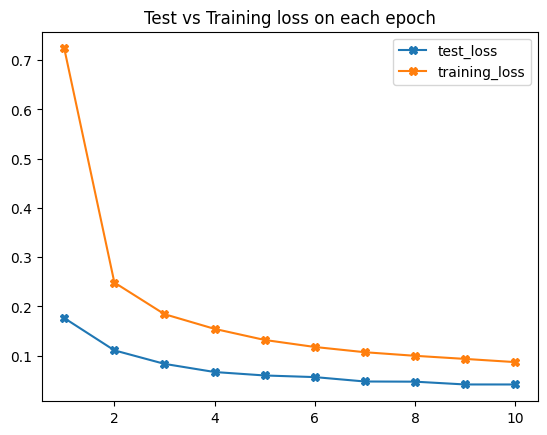

In [92]:
plotting_data_dict = plotting_data.history

test_loss = plotting_data_dict['val_loss']
training_loss = plotting_data_dict['loss']
test_accuracy = plotting_data_dict['val_accuracy']
training_accuracy = plotting_data_dict['accuracy']

epochs = range(1,len(test_loss)+1)

plt.plot(epochs,test_loss,marker='X',label='test_loss')
plt.plot(epochs,training_loss,marker='X',label='training_loss')
plt.title('Test vs Training loss on each epoch')
plt.legend()

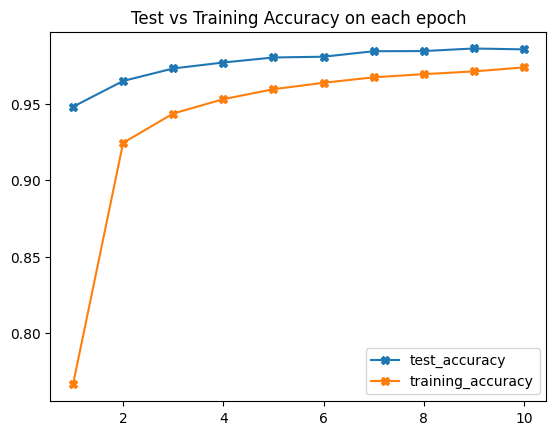

In [93]:
plt.plot(epochs,test_accuracy,marker='X',label='test_accuracy')
plt.plot(epochs,training_accuracy,marker='X',label='training_accuracy')
plt.title('Test vs Training Accuracy on each epoch')
plt.legend()

# Step 7 - Saving and Loading our model

In [99]:
model.save('MNIST_10_epochs')
print('Model Saved !!!')

#NOTE: USE THIS TO LOAD THE MODEL
classifier = load_model('MNIST_10_epochs')

Model Saved !!!


# Step 8 - Let's make some predictions using test images

In [126]:
def get_prediction(input_img) -> float:
    input_img = input_img.reshape(1,28,28,1)
    prediction_vector = classifier.predict(input_img,2,verbose=0)[0]
    return np.argmax(prediction_vector,axis=0)

In [ ]:
while True:
    index = input('Enter the index of the image that you want to test')
    index = int(index)
    pred = get_prediction(test_X[index])
    print('predicted as: ', pred)
    plt.imshow(test_X[index],cmap='gray')
    plt.show()